## References

In [25]:
# https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html
# https://medium.com/square-corner-blog/topic-modeling-optimizing-for-human-interpretability-48a81f6ce0ed

## Prepare Notebook

In [26]:
# import packages
import logging
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.models import HdpModel, LsiModel, CoherenceModel

In [27]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Training Corpora and Dictionaries

In [28]:
# load no pooling corpus
if (os.path.exists("tourism_no_pooling.dict")):
   dictionary_no_pooling = corpora.Dictionary.load('tourism_no_pooling.dict')
   corpus_no_pooling = corpora.MmCorpus('tourism_no_pooling.mm')
   print("Vectorized no pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load user pooling corpus
if (os.path.exists("tourism_user_pooling.dict")):
   dictionary_user_pooling = corpora.Dictionary.load('tourism_user_pooling.dict')
   corpus_user_pooling = corpora.MmCorpus('tourism_user_pooling.mm')
   print("Vectorized user pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load hashtag pooling corpus
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary_hashtag_pooling = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   corpus_hashtag_pooling = corpora.MmCorpus('tourism_hashtag_pooling.mm')
   print("Vectorized hashtag pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

2018-10-05 14:47:49,823 : INFO : loading Dictionary object from tourism_no_pooling.dict
2018-10-05 14:47:49,830 : INFO : loaded tourism_no_pooling.dict
2018-10-05 14:47:49,835 : INFO : loaded corpus index from tourism_no_pooling.mm.index
2018-10-05 14:47:49,836 : INFO : initializing cython corpus reader from tourism_no_pooling.mm
2018-10-05 14:47:49,839 : INFO : accepted corpus with 7633 documents, 4790 features, 37016 non-zero entries
2018-10-05 14:47:49,842 : INFO : loading Dictionary object from tourism_user_pooling.dict
2018-10-05 14:47:49,848 : INFO : loaded tourism_user_pooling.dict
2018-10-05 14:47:49,852 : INFO : loaded corpus index from tourism_user_pooling.mm.index
2018-10-05 14:47:49,854 : INFO : initializing cython corpus reader from tourism_user_pooling.mm
2018-10-05 14:47:49,856 : INFO : accepted corpus with 4424 documents, 3990 features, 30119 non-zero entries
2018-10-05 14:47:49,859 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-10-05 14:47:49

Vectorized no pooling corpus loaded!
Vectorized user pooling corpus loaded!
Vectorized hashtag pooling corpus loaded!


## Load Documents

In [29]:
# load no pooling documents
with open ('tokenized_documents_no_pooling.p', 'rb') as fp:
    tokenized_documents_no_pooling = pickle.load(fp)

# load user pooling documents
with open('tokenized_documents_user_pooling.p', 'rb') as fp:
    tokenized_documents_user_pooling = pickle.load(fp)

# load hashtag pooling documents
with open('tokenized_documents_hashtag_pooling.p', 'rb') as fp:
    tokenized_documents_hashtag_pooling = pickle.load(fp)

## Load LDA Models (Trained in TopicModeling#2 Script)

In [30]:
# load models
lda_model_no_pooling = models.LdaModel.load('lda_model_no_pooling.model') # 6 topics
lda_model_user_pooling = models.LdaModel.load('lda_model_user_pooling.model') # 7 topics
lda_model_hashtag_pooling = models.LdaModel.load('lda_model_hashtag_pooling.model') # 7 topics

2018-10-05 14:47:51,942 : INFO : loading LdaModel object from lda_model_no_pooling.model
2018-10-05 14:47:51,946 : INFO : loading expElogbeta from lda_model_no_pooling.model.expElogbeta.npy with mmap=None
2018-10-05 14:47:51,949 : INFO : setting ignored attribute dispatcher to None
2018-10-05 14:47:51,951 : INFO : setting ignored attribute id2word to None
2018-10-05 14:47:51,954 : INFO : setting ignored attribute state to None
2018-10-05 14:47:51,956 : INFO : loaded lda_model_no_pooling.model
2018-10-05 14:47:51,959 : INFO : loading LdaState object from lda_model_no_pooling.model.state
2018-10-05 14:47:51,963 : INFO : loaded lda_model_no_pooling.model.state
2018-10-05 14:47:51,971 : INFO : loading LdaModel object from lda_model_user_pooling.model
2018-10-05 14:47:51,974 : INFO : loading expElogbeta from lda_model_user_pooling.model.expElogbeta.npy with mmap=None
2018-10-05 14:47:51,977 : INFO : setting ignored attribute dispatcher to None
2018-10-05 14:47:51,979 : INFO : setting ignore

In [31]:
# extract topics with word probabilities
lda_topics_no_pooling = lda_model_no_pooling.show_topics(formatted=False)
lda_topics_user_pooling = lda_model_user_pooling.show_topics(formatted=False)
lda_topics_hashtag_pooling = lda_model_hashtag_pooling.show_topics(formatted=False)

## Train HDP Models

In [32]:
# train HDP models with different pooling methods (similar to LDA in TopicModeling#2 Script)
hdp_model_no_pooling = HdpModel(corpus_no_pooling, dictionary_no_pooling)
hdp_model_user_pooling = HdpModel(corpus_user_pooling, dictionary_user_pooling)
hdp_model_hashtag_pooling = HdpModel(corpus_hashtag_pooling, dictionary_hashtag_pooling)

2018-10-05 14:48:21,042 : INFO : (0, '0.002*pacha + 0.002*obviously + 0.002*expo + 0.001*#live + 0.001*home + 0.001*flat + 0.001*masterpiece + 0.001*heavy + 0.001*#summertimefun + 0.001*ball')
2018-10-05 14:48:21,048 : INFO : (1, '0.003*quarter + 0.003*gothic + 0.002*saturday + 0.001*cuando + 0.001*#urbanart + 0.001*#smodatamentegoestospain + 0.001*chart + 0.001*joy + 0.001*#cute + 0.001*#cataluña')
2018-10-05 14:48:21,057 : INFO : (2, '0.002*parque + 0.002*#models + 0.002*#curiosities + 0.002*sagrada + 0.002*snuck + 0.001*#sagradafamilia + 0.001*oldie + 0.001*#tweetgram + 0.001*jueves + 0.001*#iggreatcaptures')
2018-10-05 14:48:21,068 : INFO : (3, '0.002*sagrada + 0.002*testing + 0.002*buxtonbrewery + 0.002*covering + 0.002*beach + 0.002*familia + 0.002*mucho + 0.001*#expo + 0.001*extend + 0.001*consists')
2018-10-05 14:48:21,086 : INFO : (4, '0.002*pikiotaco + 0.002*#cactus + 0.002*church + 0.001*#bravas + 0.001*russian + 0.001*must + 0.001*inside + 0.001*middle + 0.001*bonanova + 0.

2018-10-05 14:48:24,636 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,644 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,653 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,664 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,670 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,675 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,681 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,688 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,694 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,698 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,703 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,708 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,712 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,716 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,731 : WARNING : likelihood is decreasing!
2018-10-05 14:48:24,737 : WARNING : likelihood is decreasing!
2018-10-

2018-10-05 14:48:28,580 : WARNING : likelihood is decreasing!
2018-10-05 14:48:28,585 : WARNING : likelihood is decreasing!
2018-10-05 14:48:28,589 : WARNING : likelihood is decreasing!
2018-10-05 14:48:28,593 : WARNING : likelihood is decreasing!
2018-10-05 14:48:28,598 : WARNING : likelihood is decreasing!
2018-10-05 14:48:28,613 : WARNING : likelihood is decreasing!
2018-10-05 14:48:28,624 : WARNING : likelihood is decreasing!
2018-10-05 14:48:28,629 : WARNING : likelihood is decreasing!
2018-10-05 14:48:29,136 : WARNING : likelihood is decreasing!
2018-10-05 14:48:29,140 : WARNING : likelihood is decreasing!
2018-10-05 14:48:29,144 : WARNING : likelihood is decreasing!
2018-10-05 14:48:29,148 : WARNING : likelihood is decreasing!
2018-10-05 14:48:29,153 : WARNING : likelihood is decreasing!
2018-10-05 14:48:29,158 : WARNING : likelihood is decreasing!
2018-10-05 14:48:30,992 : WARNING : likelihood is decreasing!
2018-10-05 14:48:30,995 : WARNING : likelihood is decreasing!
2018-10-

2018-10-05 14:49:13,914 : INFO : (5, '0.004*#artecallejero + 0.004*#graffiti + 0.004*#artederua + 0.003*#streetart + 0.003*#streetphotography + 0.002*#tweegram + 0.002*#igeurope + 0.001*#graffitiart + 0.001*#endofalife + 0.001*michelleletcher')
2018-10-05 14:49:13,943 : INFO : (6, '0.002*#family + 0.001*obligada + 0.001*#beach + 0.001*#roadgoeseveronandon + 0.001*jason + 0.001*#radio + 0.001*#aftetwork + 0.001*clubsdir + 0.001*#travellover + 0.001*#singer')
2018-10-05 14:49:13,964 : INFO : (7, '0.008*#endomondo + 0.008*km + 0.008*#endorphins + 0.005*finished + 0.005*running + 0.002*walking + 0.001*cycling + 0.001*skating + 0.001*read + 0.001*#davidbowie')
2018-10-05 14:49:13,987 : INFO : (8, '0.005*#sport + 0.005*#women + 0.004*#spoonie + 0.004*#neversettle + 0.004*#training + 0.003*#fit + 0.003*#workout + 0.003*#lifestyle + 0.002*#breathe + 0.001*dinner')
2018-10-05 14:49:14,009 : INFO : (9, '0.001*#razza + 0.001*rn + 0.001*seems + 0.001*#afterwork + 0.001*#blurredroses + 0.001*playli

In [33]:
# exctract topics with word probabilities
hdp_topics_no_pooling = hdp_model_no_pooling.show_topics(formatted=False)
hdp_topics_user_pooling = hdp_model_user_pooling.show_topics(formatted=False)
hdp_topics_hashtag_pooling = hdp_model_hashtag_pooling.show_topics(formatted=False)

In [34]:
hdp_topics_hashtag_pooling

[(0,
  [('#sagradafamilia', 0.020104094287345747),
   ('sagrada', 0.01431705534994243),
   ('#travel', 0.011150434063015075),
   ('#gaudi', 0.010138043021686473),
   ('familia', 0.0081639877784427245),
   ('#summer', 0.008093204048788067),
   ('#love', 0.0074128255525288738),
   ('basílica', 0.0063059765650289286),
   ('#art', 0.0060951422190765213),
   ('#architecture', 0.0060646519608707344),
   ('#photography', 0.0056632161287118532),
   ('#friends', 0.0050666740341459579),
   ('#streetart', 0.0048707657739336333),
   ('#graffiti', 0.0047116415642612713),
   ('gothic', 0.0044356081970443459),
   ('#europe', 0.0041907149455163968),
   ('#beach', 0.0039742761115604125),
   ('#sun', 0.0038397769162339217),
   ('#catalonia', 0.0037180365846730002),
   ('quarter', 0.0034959738800756667)]),
 (1,
  [('#arteurbano', 0.010384641395026536),
   ('#streetart', 0.010054511092924814),
   ('#digerible', 0.0099033292769237571),
   ('arte', 0.0075019357710206912),
   ('urbano', 0.0072561923775124665

## Train LSI Models

In [35]:
# train LSI models with similar configurations as LDA models
lsi_model_no_pooling = LsiModel(corpus=corpus_no_pooling, num_topics=6, id2word=dictionary_no_pooling)
lsi_model_user_pooling = LsiModel(corpus=corpus_user_pooling, num_topics=7, id2word=dictionary_user_pooling)
lsi_model_hashtag_pooling = LsiModel(corpus=corpus_hashtag_pooling, num_topics=7, id2word=dictionary_hashtag_pooling)

2018-10-05 14:49:14,713 : INFO : using serial LSI version on this node
2018-10-05 14:49:14,718 : INFO : updating model with new documents
2018-10-05 14:49:14,762 : INFO : preparing a new chunk of documents
2018-10-05 14:49:14,808 : INFO : using 100 extra samples and 2 power iterations
2018-10-05 14:49:14,810 : INFO : 1st phase: constructing (4790, 106) action matrix
2018-10-05 14:49:14,890 : INFO : orthonormalizing (4790, 106) action matrix
2018-10-05 14:49:15,065 : INFO : 2nd phase: running dense svd on (106, 7633) matrix
2018-10-05 14:49:15,191 : INFO : computing the final decomposition
2018-10-05 14:49:15,192 : INFO : keeping 6 factors (discarding 64.764% of energy spectrum)
2018-10-05 14:49:15,197 : INFO : processed documents up to #7633
2018-10-05 14:49:15,201 : INFO : topic #0(48.355): 0.783*"sagrada" + 0.533*"familia" + 0.213*"basílica" + 0.189*"família" + 0.103*"#sagradafamilia" + 0.033*"#gaudi" + 0.032*"beautiful" + 0.027*"gaudi" + 0.024*"inside" + 0.022*"basilica"
2018-10-05 

In [36]:
# extract topics with word probabilities
lsi_topics_no_pooling = lsi_model_no_pooling.show_topics(formatted=False)
lsi_topics_user_pooling = lsi_model_user_pooling.show_topics(formatted=False)
lsi_topics_hashtag_pooling = lsi_model_hashtag_pooling.show_topics(formatted=False)

## Calculate Coherence Values

In [37]:
# extract top topic words
lsi_topics_no_pooling = [[word for word, prob in topic] for topicid, topic in lsi_topics_no_pooling]
lsi_topics_user_pooling = [[word for word, prob in topic] for topicid, topic in lsi_topics_user_pooling]
lsi_topics_hashtag_pooling = [[word for word, prob in topic] for topicid, topic in lsi_topics_hashtag_pooling]

hdp_topics_no_pooling = [[word for word, prob in topic] for topicid, topic in hdp_topics_no_pooling]
hdp_topics_user_pooling = [[word for word, prob in topic] for topicid, topic in hdp_topics_user_pooling]
hdp_topics_hashtag_pooling = [[word for word, prob in topic] for topicid, topic in hdp_topics_hashtag_pooling]

lda_topics_no_pooling = [[word for word, prob in topic] for topicid, topic in lda_topics_no_pooling]
lda_topics_user_pooling = [[word for word, prob in topic] for topicid, topic in lda_topics_user_pooling]
lda_topics_hashtag_pooling = [[word for word, prob in topic] for topicid, topic in lda_topics_hashtag_pooling]

In [38]:
# calculate coherences
lsi_no_pooling_coherence = CoherenceModel(topics=lsi_topics_no_pooling, texts=tokenized_documents_no_pooling, dictionary=dictionary_no_pooling, window_size=10).get_coherence()
lsi_user_pooling_coherence = CoherenceModel(topics=lsi_topics_user_pooling, texts=tokenized_documents_user_pooling, dictionary=dictionary_user_pooling, window_size=10).get_coherence()
lsi_hashtag_pooling_coherence = CoherenceModel(topics=lsi_topics_hashtag_pooling, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()

hdp_no_pooling_coherence = CoherenceModel(topics=hdp_topics_no_pooling, texts=tokenized_documents_no_pooling, dictionary=dictionary_no_pooling, window_size=10).get_coherence()
hdp_user_pooling_coherence = CoherenceModel(topics=hdp_topics_user_pooling, texts=tokenized_documents_user_pooling, dictionary=dictionary_user_pooling, window_size=10).get_coherence()
hdp_hashtag_pooling_coherence = CoherenceModel(topics=hdp_topics_hashtag_pooling, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()

lda_no_pooling_coherence = CoherenceModel(topics=lda_topics_no_pooling, texts=tokenized_documents_no_pooling, dictionary=dictionary_no_pooling, window_size=10).get_coherence()
lda_user_pooling_coherence = CoherenceModel(topics=lda_topics_user_pooling, texts=tokenized_documents_user_pooling, dictionary=dictionary_user_pooling, window_size=10).get_coherence()
lda_hashtag_pooling_coherence = CoherenceModel(topics=lda_topics_hashtag_pooling, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()

2018-10-05 14:49:16,739 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-10-05 14:49:22,963 : INFO : 1 batches submitted to accumulate stats from 64 documents (146 virtual)
2018-10-05 14:49:22,965 : INFO : 2 batches submitted to accumulate stats from 128 documents (236 virtual)
2018-10-05 14:49:22,970 : INFO : 3 batches submitted to accumulate stats from 192 documents (330 virtual)
2018-10-05 14:49:22,974 : INFO : 4 batches submitted to accumulate stats from 256 documents (474 virtual)
2018-10-05 14:49:22,979 : INFO : 5 batches submitted to accumulate stats from 320 documents (604 virtual)
2018-10-05 14:49:22,983 : INFO : 6 batches submitted to accumulate stats from 384 documents (752 virtual)
2018-10-05 14:49:22,988 : INFO : 7 batches submitted to accumulate stats from 448 documents (821 virtual)
2018-10-05 14:49:22,994 : INFO : 8 batches submitted to accumulate stats from 512 documents (952 virtual)
2018-

2018-10-05 14:49:29,409 : INFO : 20 batches submitted to accumulate stats from 1280 documents (26019 virtual)
2018-10-05 14:49:29,423 : INFO : 21 batches submitted to accumulate stats from 1344 documents (26126 virtual)
2018-10-05 14:49:29,426 : INFO : 22 batches submitted to accumulate stats from 1408 documents (26272 virtual)
2018-10-05 14:49:29,452 : INFO : 23 batches submitted to accumulate stats from 1472 documents (26335 virtual)
2018-10-05 14:49:29,455 : INFO : 24 batches submitted to accumulate stats from 1536 documents (26382 virtual)
2018-10-05 14:49:29,460 : INFO : 25 batches submitted to accumulate stats from 1600 documents (26443 virtual)
2018-10-05 14:49:29,478 : INFO : 26 batches submitted to accumulate stats from 1664 documents (26528 virtual)
2018-10-05 14:49:29,490 : INFO : 27 batches submitted to accumulate stats from 1728 documents (26622 virtual)
2018-10-05 14:49:29,501 : INFO : 28 batches submitted to accumulate stats from 1792 documents (26701 virtual)
2018-10-05

2018-10-05 14:49:41,207 : INFO : 21 batches submitted to accumulate stats from 1344 documents (2786 virtual)
2018-10-05 14:49:41,211 : INFO : 22 batches submitted to accumulate stats from 1408 documents (2944 virtual)
2018-10-05 14:49:41,217 : INFO : 23 batches submitted to accumulate stats from 1472 documents (3046 virtual)
2018-10-05 14:49:41,224 : INFO : 24 batches submitted to accumulate stats from 1536 documents (3155 virtual)
2018-10-05 14:49:41,229 : INFO : 25 batches submitted to accumulate stats from 1600 documents (3273 virtual)
2018-10-05 14:49:41,234 : INFO : 26 batches submitted to accumulate stats from 1664 documents (3400 virtual)
2018-10-05 14:49:41,237 : INFO : 27 batches submitted to accumulate stats from 1728 documents (3467 virtual)
2018-10-05 14:49:41,245 : INFO : 28 batches submitted to accumulate stats from 1792 documents (3504 virtual)
2018-10-05 14:49:41,248 : INFO : 29 batches submitted to accumulate stats from 1856 documents (3609 virtual)
2018-10-05 14:49:41

2018-10-05 14:49:48,486 : INFO : 26 batches submitted to accumulate stats from 1664 documents (31742 virtual)
2018-10-05 14:49:48,493 : INFO : 27 batches submitted to accumulate stats from 1728 documents (31894 virtual)
2018-10-05 14:49:48,501 : INFO : 28 batches submitted to accumulate stats from 1792 documents (32008 virtual)
2018-10-05 14:49:48,511 : INFO : 29 batches submitted to accumulate stats from 1856 documents (32160 virtual)
2018-10-05 14:49:48,521 : INFO : 30 batches submitted to accumulate stats from 1920 documents (32241 virtual)
2018-10-05 14:49:48,541 : INFO : 31 batches submitted to accumulate stats from 1984 documents (32349 virtual)
2018-10-05 14:49:48,549 : INFO : 32 batches submitted to accumulate stats from 2048 documents (32411 virtual)
2018-10-05 14:49:48,555 : INFO : 33 batches submitted to accumulate stats from 2112 documents (32440 virtual)
2018-10-05 14:49:48,568 : INFO : 34 batches submitted to accumulate stats from 2176 documents (32545 virtual)
2018-10-05

2018-10-05 14:49:56,363 : INFO : 53 batches submitted to accumulate stats from 3392 documents (84845 virtual)
2018-10-05 14:49:56,394 : INFO : 54 batches submitted to accumulate stats from 3456 documents (85422 virtual)
2018-10-05 14:49:56,533 : INFO : 3 accumulators retrieved from output queue
2018-10-05 14:49:56,587 : INFO : accumulated word occurrence stats for 87485 virtual documents
2018-10-05 14:49:57,925 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-10-05 14:50:02,571 : INFO : 1 batches submitted to accumulate stats from 64 documents (133 virtual)
2018-10-05 14:50:02,573 : INFO : 2 batches submitted to accumulate stats from 128 documents (256 virtual)
2018-10-05 14:50:02,577 : INFO : 3 batches submitted to accumulate stats from 192 documents (365 virtual)
2018-10-05 14:50:02,581 : INFO : 4 batches submitted to accumulate stats from 256 documents (544 virtual)
2018-10-05 14:50:02,585 : INFO : 5 bat

2018-10-05 14:50:03,087 : INFO : 72 batches submitted to accumulate stats from 4608 documents (7008 virtual)
2018-10-05 14:50:03,090 : INFO : 73 batches submitted to accumulate stats from 4672 documents (7022 virtual)
2018-10-05 14:50:03,151 : INFO : 3 accumulators retrieved from output queue
2018-10-05 14:50:03,175 : INFO : accumulated word occurrence stats for 12449 virtual documents
2018-10-05 14:50:03,375 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-10-05 14:50:08,265 : INFO : 1 batches submitted to accumulate stats from 64 documents (6943 virtual)
2018-10-05 14:50:08,268 : INFO : 2 batches submitted to accumulate stats from 128 documents (9978 virtual)
2018-10-05 14:50:08,274 : INFO : 3 batches submitted to accumulate stats from 192 documents (12712 virtual)
2018-10-05 14:50:08,280 : INFO : 4 batches submitted to accumulate stats from 256 documents (14880 virtual)
2018-10-05 14:50:08,286 : INFO : 5

2018-10-05 14:50:14,654 : INFO : 23 batches submitted to accumulate stats from 1472 documents (47737 virtual)
2018-10-05 14:50:14,687 : INFO : 24 batches submitted to accumulate stats from 1536 documents (48374 virtual)
2018-10-05 14:50:14,699 : INFO : 25 batches submitted to accumulate stats from 1600 documents (49767 virtual)
2018-10-05 14:50:14,756 : INFO : 26 batches submitted to accumulate stats from 1664 documents (52147 virtual)
2018-10-05 14:50:14,768 : INFO : 27 batches submitted to accumulate stats from 1728 documents (52900 virtual)
2018-10-05 14:50:14,785 : INFO : 28 batches submitted to accumulate stats from 1792 documents (54007 virtual)
2018-10-05 14:50:14,808 : INFO : 29 batches submitted to accumulate stats from 1856 documents (54820 virtual)
2018-10-05 14:50:14,840 : INFO : 30 batches submitted to accumulate stats from 1920 documents (55506 virtual)
2018-10-05 14:50:14,857 : INFO : 31 batches submitted to accumulate stats from 1984 documents (59528 virtual)
2018-10-05

In [39]:
# define function to plot a graph to compare coherence scores
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center', color=['red','red','red','green','green','green','blue','blue','blue'])
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

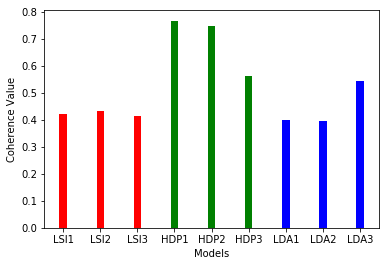

In [40]:
# compare coherence scores
evaluate_bar_graph([lsi_no_pooling_coherence, lsi_user_pooling_coherence, lsi_hashtag_pooling_coherence,
                    hdp_no_pooling_coherence, hdp_user_pooling_coherence, hdp_hashtag_pooling_coherence,
                    lda_no_pooling_coherence, lda_user_pooling_coherence, lda_hashtag_pooling_coherence],
                   ['LSI1', 'LSI2', 'LSI3', 'HDP1', 'HDP2',
                    'HDP3', 'LDA1', 'LDA2', 'LDA3'])
# plt.savefig("topic_model_comparison")
plt.show()

#### The HDP models have the best coherence scores but the topics are way too granular on inspection. In fact, the LDA achieves similar coherence scores if the number of topics is increased. But to ensure human interpretability, the number of topics is restricted to a lower number. In addition, the HDP models are very unstable on retraining. The hashtag pooling LDA model has by far the highest coherence score of the LSI and LDA models which is in line with the result after human inspection.